# Machine Learning - Practical work 01

## 3. Quick numpy introduction

### Max of each row and max of each column

In [6]:
import numpy as np

array1 = np.array([
    [1, 2, 3],
    [4, 5, 6]
])

print("The max of each row is {}".format(np.amax(array1, axis = 1)))
print("The max of each column is {}".format(np.amax(array1, axis = 0)))

The max of each row is [3 6]
The max of each column is [4 5 6]


### Print the elements of array1 that are less than 4

In [7]:
import numpy as np

array1 = np.array([
    [1, 2, 3],
    [4, 5, 6]
])

mask = array1 < 4
print("Elements of array1 that are < 4: {}".format(array1[mask]))

Elements of array1 that are < 4: [1 2 3]


### Convert the values of array2 to the range [0, 1]

In [8]:
array2 = np.array([5, 8, 2, 9, 4, 3])

max = np.amax(array2)
ranger = np.vectorize(lambda t : t/max)
ranger(array2)

array([0.55555556, 0.88888889, 0.22222222, 1.        , 0.44444444,
       0.33333333])

## 4. Loading a dataset with numpy

## 5. Quick Introduction to Pandas

### Méthode choisie pour répondre au problème

- Nous avons utilisé la méthode groupby de DataFrame pour groupé les données en fonctiond de la colonne 'class'.
- Nous n'affichons ensuite que les valeurs liées à la variable 'alcohol'

In [9]:
import pandas as pd
import numpy as np

data = np.genfromtxt('data/wine/wine.data', delimiter=',')
colnames = np.array([
    'class', 'alcohol', 'malic acid', 'ash', 'alcalinity of ash', 'magnesium', 'total phenols', 
    'flavanoids', 'nonflavanoid phenols', 'proanthocyanins', 'color intensity', 'hue',
    'OD280/OD315 of diluted wines', 'proline'
])

df = pd.DataFrame(data=data[:,1:], columns=colnames[1:])
df['class'] = data[:,0].astype(np.int)

print(df.groupby('class').describe()['alcohol'])

       count       mean       std    min     25%     50%     75%    max
class                                                                  
1       59.0  13.744746  0.462125  12.85  13.400  13.750  14.100  14.83
2       71.0  12.278732  0.537964  11.03  11.915  12.290  12.515  13.86
3       48.0  13.153750  0.530241  12.20  12.805  13.165  13.505  14.34


### Résultats

On remarque donc différentes propriétés statistiques des différentes classes de vin. Le tableau ci-dessous résume les informations les plus importantes.

| Classe        | % d'alcool en moyenne | Médiane % d'alcool| Max % d'alcool | Min % d'alcool | 
| ------------- | ------------- | ----- | --- | --- | --- |
| 1             | 13.74 | 13.75 | 14.83 | 12.85 |
| 2             | 12.28 | 12.29 | 13.86 | 11.03 |
| 3             | 13.15 | 13.17 | 14.34 | 12.20 |

## 6. Visual exploratory analysis of data 

### <p style="background-color:#660066; color:#fff;padding:5px; font-weight:bold">Q: By looking at the boxplot, which features seems the most discriminative ?</p>
Il est difficile de désigner un trait de vin pour lequel les classes sont absolument distinctes. Une boîte à moustache permet de visualiser, pour une distribution de valeurs donnée, si une valeur peut être considérée comme aberrante ou non (respectivement en dehors ou en dedans des deux moustaches). Le cas idéal que l'on rechercherait serait donc un trait de vin pour lequel les moustaches des boîtes à moustaches de chaque classe forment des plages qui ne se chevauchent pas. 

Il est évident que nous n'avons pas trouvé un tel trait, nous allons donc considérer les traits dont les boîtes de la boîte à moustache ne se chevauchent pas (ou peu).

On peut donc retenir par exemple les traits de vin suivants comme relativement distincts entre les différentes classes : 
- flavanoids
- proline
- color intensity

## 7. Classifying the wine data

In [10]:
import pandas as pd
import numpy as np

data = np.genfromtxt('data/wine/wine.data', delimiter=',')
colnames = np.array([
    'class', 'alcohol', 'malic acid', 'ash', 'alcalinity of ash', 'magnesium', 'total phenols', 
    'flavanoids', 'nonflavanoid phenols', 'proanthocyanins', 'color intensity', 'hue',
    'OD280/OD315 of diluted wines', 'proline'
])

df = pd.DataFrame(data=data[:,1:], columns=colnames[1:])
df['class'] = data[:,0].astype(np.int)

pred = []

for row in df['alcohol']:
    if row > 13.5:
        pred.append(1);
    elif row > 12.75 and row < 13.5 :
        pred.append(2);    
    else:
        pred.append(3)

# A new column is added to the dataframe
df['prediction'] = pred

len(df.loc[df['class'] == df['prediction']]) / len(df)



0.33707865168539325

En utilisant la formule proposée, on obtient une performance de environ 38% prédictions correctes. Ce n'est pas très bon.

## 8. Performance evaluation

In [11]:
pred = []

for row in df['flavanoids']:
    if row >= 2.5:
        pred.append(1);
    elif row > 1.8 and row < 2.5 :
        pred.append(2);    
    else:
        pred.append(3)

# A new column is added to the dataframe
df['prediction'] = pred

### <p style="background-color:#660066; color:#fff;padding:5px; font-weight:bold">Q: Compute the confusion matrix of the resulting rule-based system ?</p>

In [12]:
# This function generates a colored confusion matrix.

import matplotlib.cm as cm

def plot_confusion_matrix(confmat, labels_names, ax=None):
    if ax is None:
        ax = pl.subplot(111)
    cmim = ax.matshow(confmat, interpolation='nearest', cmap=cm.jet)

    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.annotate(str(confmat[i, j]), xy=(j, i),
                        horizontalalignment='center',
                        verticalalignment='center',
                        fontsize=8)
    ax.set_xticks(np.arange(confmat.shape[0]))
    ax.set_xticklabels([labels_names[l] for l in range(confmat.shape[0])], rotation='vertical')
    ax.set_yticks(np.arange(confmat.shape[1]))
    _ = ax.set_yticklabels([labels_names[l] for l in range(confmat.shape[1])])
    ax.set_xlabel('predicted label')
    ax.xaxis.set_label_position('top')
    ax.set_ylabel('true label')
    pl.colorbar(cmim, shrink=0.7, orientation='horizontal', pad=0.01)

Populating the interactive namespace from numpy and matplotlib
             precision    recall  f1-score   support

          1       0.75      0.90      0.82        59
          2       0.81      0.37      0.50        71
          3       0.64      1.00      0.78        48

avg / total       0.74      0.71      0.68       178



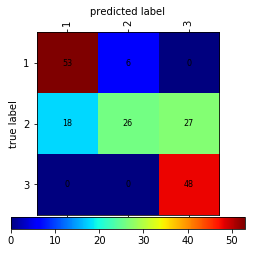

In [13]:
import sklearn.metrics as skmetrics
import pylab as pl # pylab is matplotlib
# The line below enables matplotlib-jupyter integration and allows plots to be displayed inline in the
# notebook. The --no-import-all is to avoid polluting our namespace with an import *
%pylab inline --no-import-all

labels_names=['1', '2', '3']
C = skmetrics.confusion_matrix(y_true=df['class'], y_pred=df['prediction'])
plot_confusion_matrix(C, labels_names)

print(skmetrics.classification_report(y_true=df['class'], y_pred=df['prediction']))

<p style="background-color:#660066; color:#fff;padding:5px; font-weight:bold">Q: Compute the precision, the recall and the f1-score of the system for a given class using the values of the confusion matrix ?</p>

On calcule ici ces valeurs pour la classe 1.

In [27]:
tp = C[0, 0]
tn = C[1, 1] + C[2, 2]
fp = C[1, 0] + C[2, 0]
fn = C[0, 1] + C[0, 2]

precision = tp / (tp + fp)
print('precision: ', precision)

recall = tp / (tp + fn)
print('recall: ', recall)

f1_score = 2 * precision * recall / ( precision + recall)
print('f1-score: ', f1_score)



precision:  0.7464788732394366
recall:  0.8983050847457628
f1-score:  0.8153846153846154


À l'arrondi à deux décimales près, on voit qu'on obtient les mêmes résultats en calculant à la main.

**precision:**  0.75

**recall:**  0.90

**f1-score:**  0.82